In [21]:
# Code based on https://github.com/kdkalvik/ST-GCN
import sys
import numpy as np
import matplotlib.pyplot as plt
import os

NUM_JOINTS = 20
inward_index = [(1, 2), (2, 3), (4, 3), #middle
                    (9, 3), (10, 9), (11, 10), (12, 11), #right arm
                    (5, 3), (6, 5), (7, 6), (8, 7), #left arm
                    (17, 1), (18, 17), (19, 18), (20, 19), #right leg
                    (13, 1), (14, 13), (15, 14), (16, 15)] #left leg

self_link = [(i, i) for i in range(NUM_JOINTS)]
inward = [(i - 1, j - 1) for (i, j) in inward_index]
outward = [(j, i) for (i, j) in inward]
neighbour = inward + outward

class Graph:
    def __init__(self, labeling_mode='spatial'):
        self.A = self.get_adjacency_matrix(labeling_mode)
        self.self_link = self_link
        self.inward = inward
        self.outward = outward
        self.neighbour = neighbour

    def get_adjacency_matrix(self, labeling_mode=None):
        if labeling_mode is None:
            return self.A
        if labeling_mode == 'spatial':
            A = get_spatial_graph(self_link, inward, outward)
        else:
            raise ValueError()
        return A

In [2]:
def edge2mat(link, num_node):
    A = np.zeros((NUM_JOINTS, NUM_JOINTS))
    for i, j in link:
        A[j, i] = 1
    return A

In [3]:
def normalize_digraph(A):
    Dl = np.sum(A, 0)
    h, w = A.shape
    Dn = np.zeros((w, w))
    for i in range(w):
        if Dl[i] > 0:
            Dn[i, i] = Dl[i] ** (-1)
    AD = np.dot(A, Dn)
    return AD

In [19]:
def get_spatial_graph(self_link, inward, outward):
    I = edge2mat(self_link, NUM_JOINTS)
    In = normalize_digraph(edge2mat(inward, NUM_JOINTS))
    Out = normalize_digraph(edge2mat(outward, NUM_JOINTS))
    A = np.stack((I, In, Out))
    return A

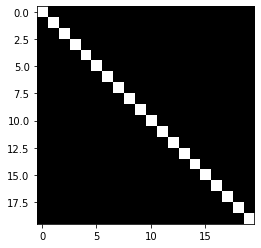

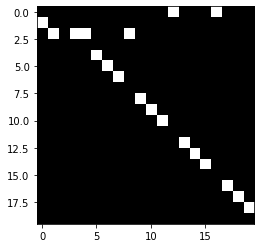

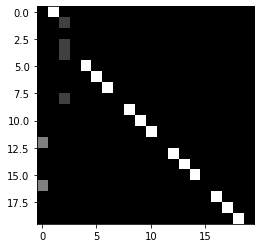

[[[1.   0.   0.   ... 0.   0.   0.  ]
  [0.   1.   0.   ... 0.   0.   0.  ]
  [0.   0.   1.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 1.   0.   0.  ]
  [0.   0.   0.   ... 0.   1.   0.  ]
  [0.   0.   0.   ... 0.   0.   1.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   1.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   1.   0.  ]
  [0.   0.   0.   ... 0.   0.   1.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   1.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.25 ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 1.   0.   0.  ]
  [0.   0.   0.   ... 0.   1.   0.  ]]]


In [22]:
if __name__ == '__main__':

    A = Graph('spatial').get_adjacency_matrix()
    for i in A:
        plt.imshow(i, cmap='gray')
        plt.show()
    print(A)